In [9]:
!pip3 install -U yellowbrick

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.inspection import permutation_importance
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use(['seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-notebook'])

In [11]:
path = 'spi_transfers_features_created_no_frees.csv'

df = pd.read_csv(path, index_col=0)
pd.set_option('display.max_columns', None)

In [12]:
df.drop(columns=['year', 'team', 'league'], inplace=True)
columns = ['most_purchased_position', 'position_max_spend', 'position_min_spend']
df = pd.get_dummies(df, columns=columns)

display(df.sample(5))
df.shape

total_transfers_in  total_transfer_out  total_spend  total_earned  \
259                   6                   7       27.000        50.490   
729                   2                   6        4.050        24.575   
96                   11                  12      175.032        30.885   
34                    5                   3       10.670         2.340   
303                   5                   2        9.018         8.100   

     average_fee_spend  average_fee_earned  max_fee_spend  min_fee_spend  \
259             4.5000            7.212857           7.20          25.20   
729             2.0250            4.095833           3.15           9.63   
96             15.9120            2.573750          37.80          10.80   
34              2.1340            0.780000           2.70           1.35   
303             1.8036            4.050000           3.60           4.50   

     avg_season_spi  avg_spend_striker  avg_spend_centre_back  \
259           60.54               4.50                   5.40   
729           63.79               0.00                   0.90   
96            70.80              19.35                  27.00   
34            61.53               0.00                   0.90   
303           70.97               3.60                   1.35   

     avg_spend_centre_mid  avg_spend_goalkeeper  avg_spend_left_winger  \
259                  6.75                 0.000                  0.000   
729                  3.15                 0.000                  0.000   
96                   7.20                 0.882                  0.450   
34                   2.70                 2.250                  2.250   
303                  1.35                 0.000                  0.018   

     avg_spend_right_winger  avg_spend_def_midfield  avg_spend_left_back  \
259                    0.00                    0.00                  2.7   
729                    0.00                    0.00                  0.0   
96                     0.00                   17.73                 13.5   
34                     2.57                    0.00                  0.0   
303                    2.70                    0.00                  0.0   

     avg_spend_right_back  avg_spend_att_midfield  most_purchased_position_-1  \
259                   0.0                    3.15                           0   
729                   0.0                    0.00                           0   
96                   21.6                   20.97                           0   
34                    0.0                    0.00                           0   
303                   0.0                    0.00                           0   

     most_purchased_position_Attacking Midfield  \
259                                           0   
729                                           0   
96                                            0   
34                                            0   
303                                           0   

     most_purchased_position_Central Midfield  \
259                                         0   
729                                         1   
96                                          0   
34                                          1   
303                                         1   

     most_purchased_position_Centre-Back  \
259                                    0   
729                                    0   
96                                     0   
34                                     0   
303                                    0   

     most_purchased_position_Defensive Midfield  \
259                                           0   
729                                           0   
96                                            0   
34                                            0   
303                                           0   

     most_purchased_position_Goalkeeper  most_purchased_position_Left Winger  \
259                                   0                              

(742, 50)

In [13]:
X = df.drop(columns=['avg_season_spi'])
y = df['avg_season_spi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
col_names = list(X_train.columns) # Will use this later

In [15]:
# RobustScaler
r_scaler = preprocessing.RobustScaler()
X_train_r = r_scaler.fit_transform(X_train)
X_train_r = pd.DataFrame(X_train_r, columns=col_names)

X_test_r = r_scaler.transform(X_test)

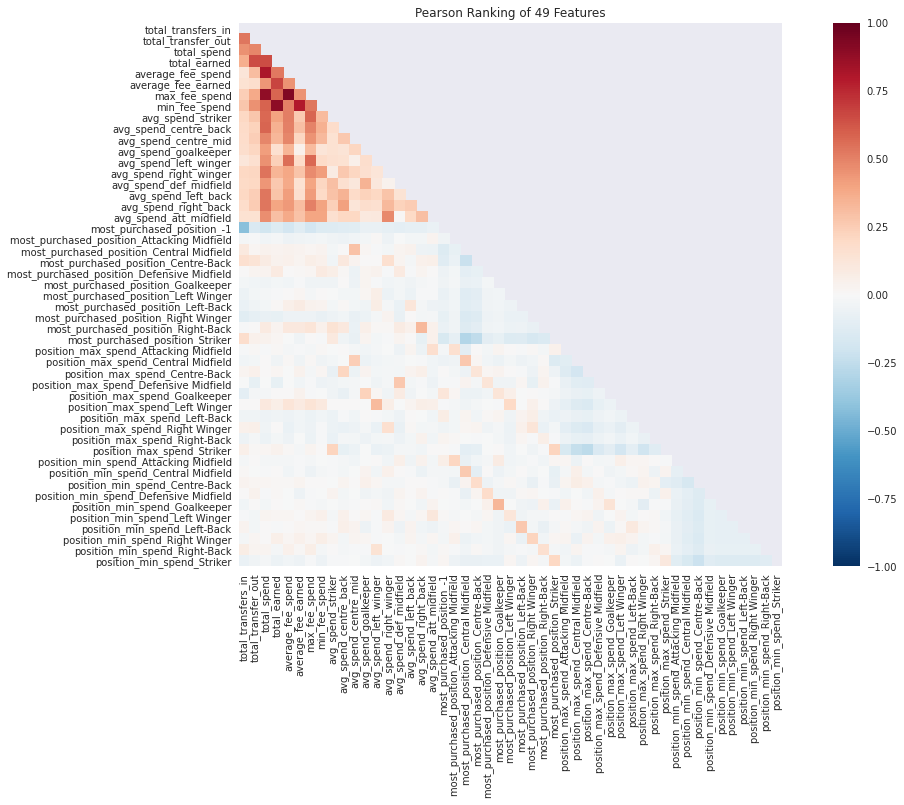

In [16]:
from yellowbrick.features import Rank2D

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
visualizer = Rank2D(algorithm='pearson')
visualizer.fit_transform(X)
visualizer.show();

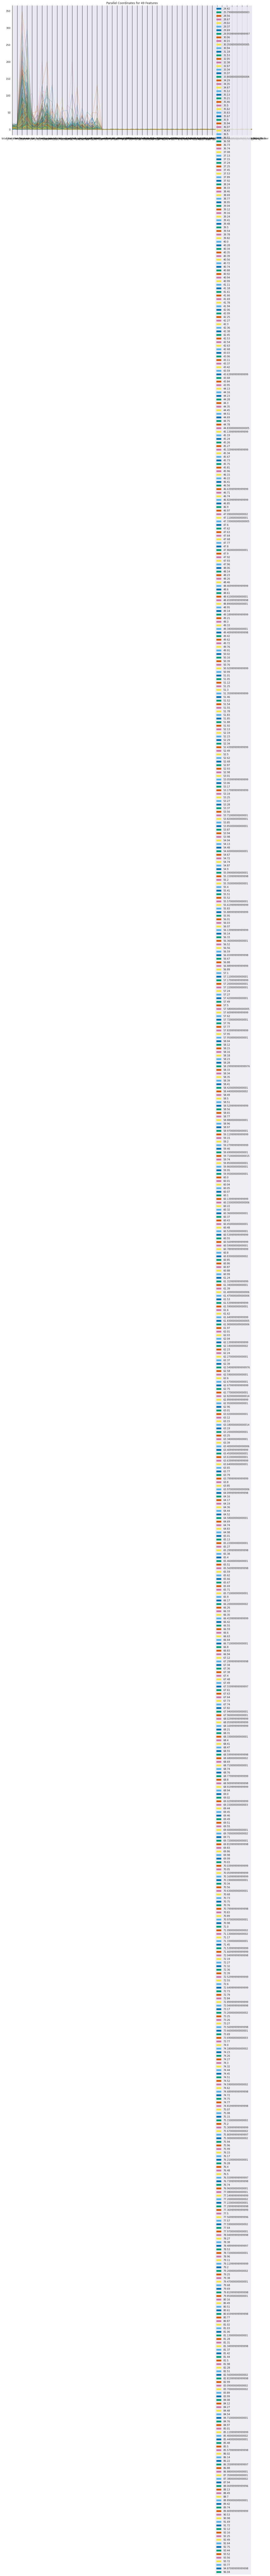

In [17]:
from yellowbrick.features import ParallelCoordinates

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show();

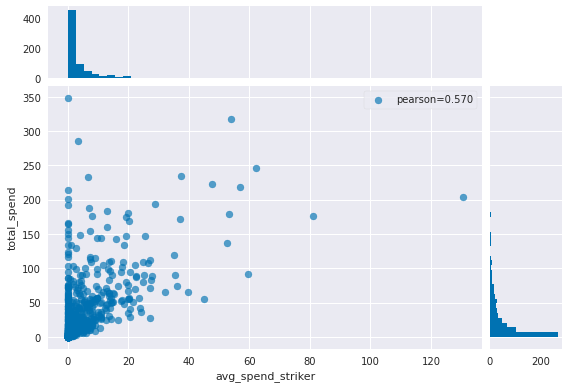

In [18]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['avg_spend_striker', 'total_spend'])
visualizer.fit_transform(X, y)
visualizer.show();

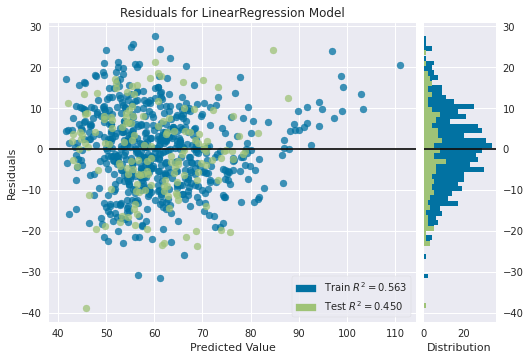

In [19]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

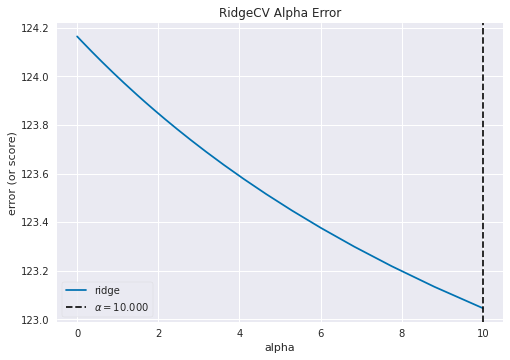

In [20]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show();

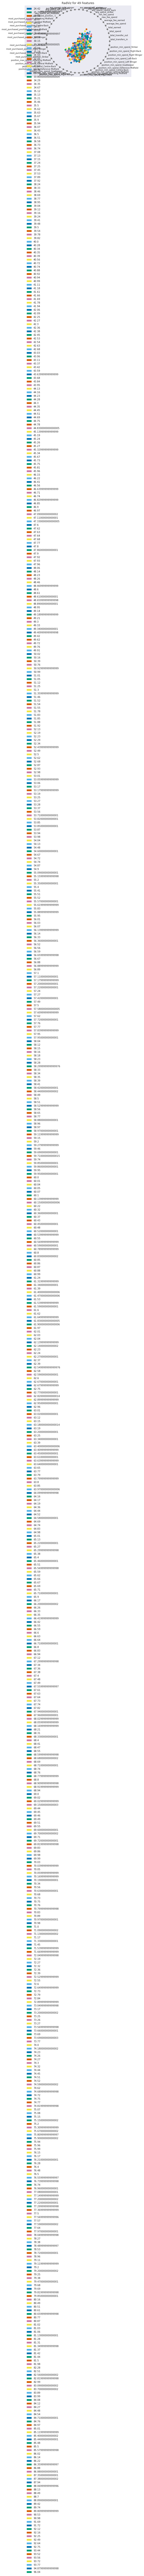

In [21]:
from yellowbrick.features import RadViz

visualizer = RadViz()
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show();

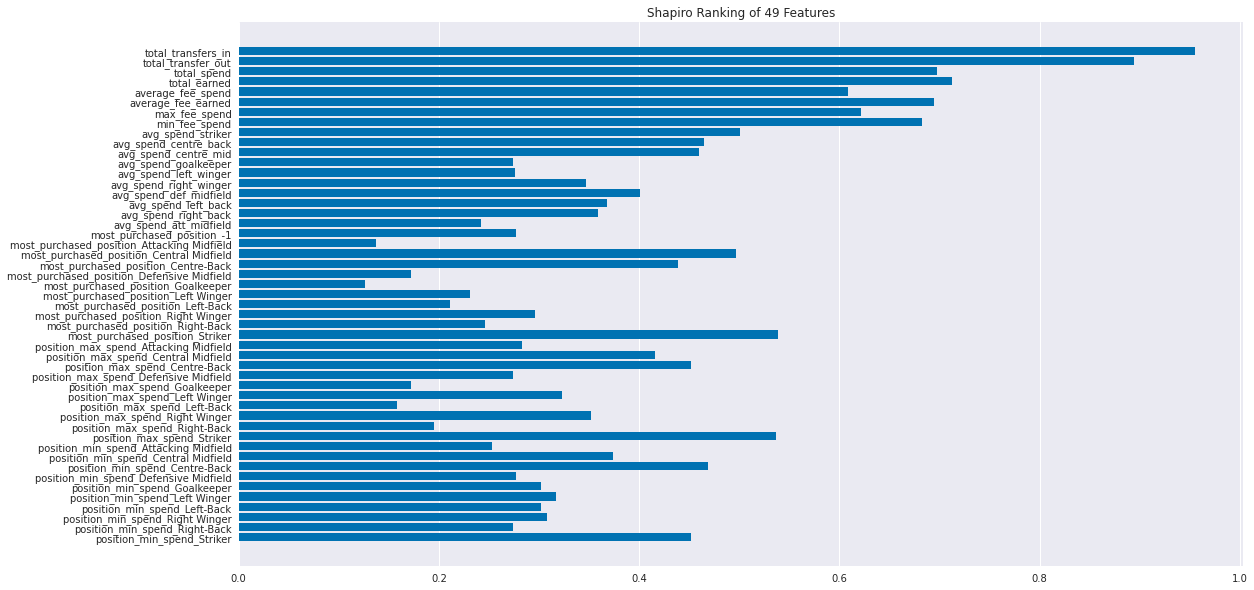

In [22]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show();

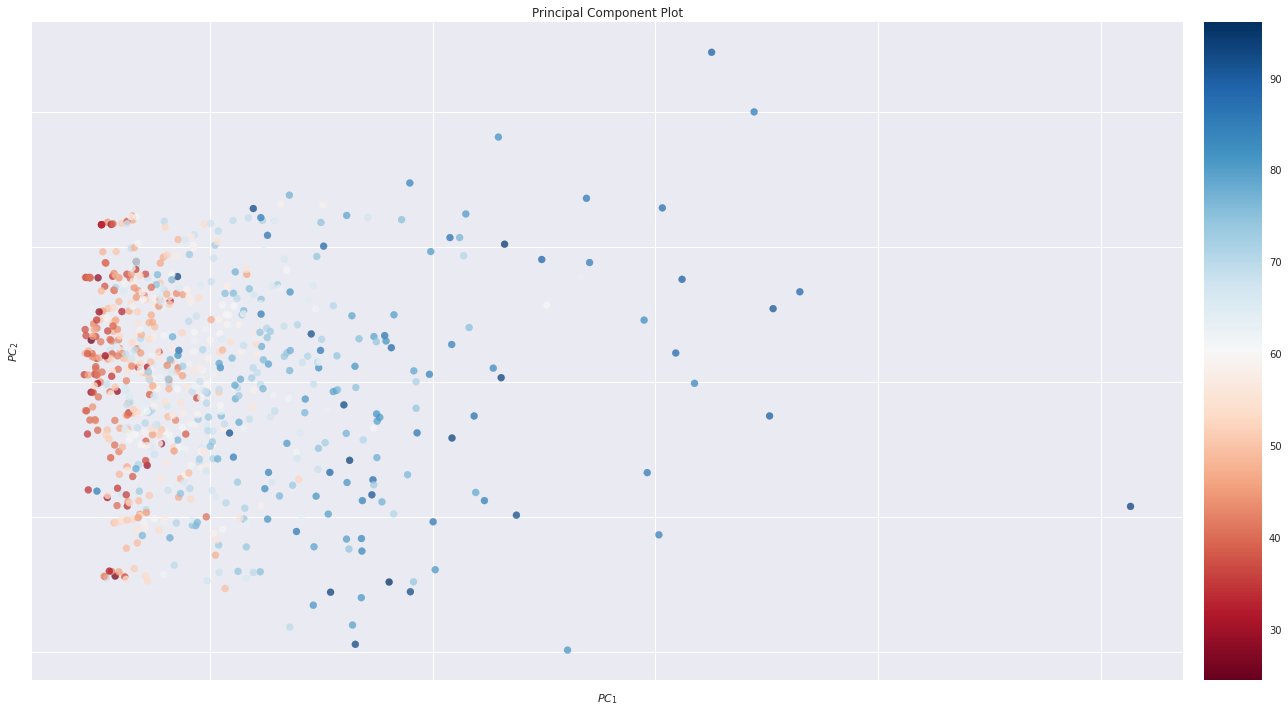

In [23]:
from yellowbrick.features import PCA

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer = PCA(scale=True)
visualizer.fit_transform(X, y)
visualizer.show();

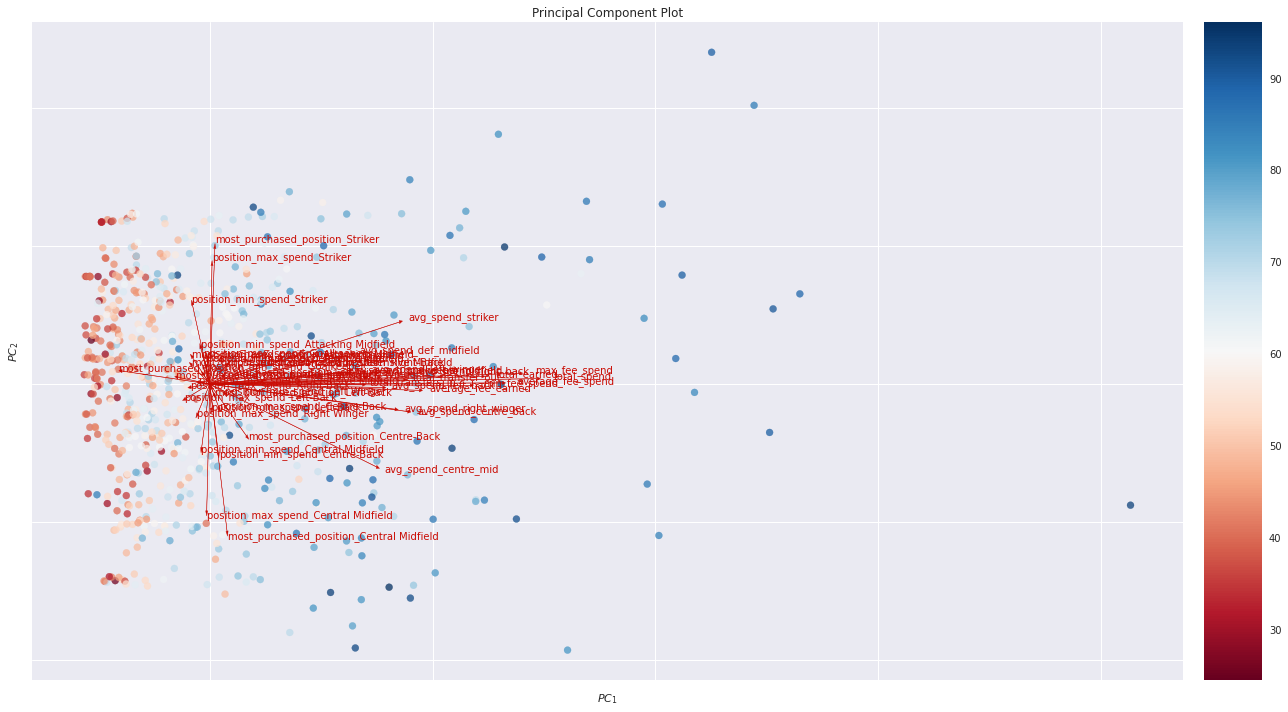

In [24]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show();

---

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.model_selection import cv_scores

 LinearRegression() 


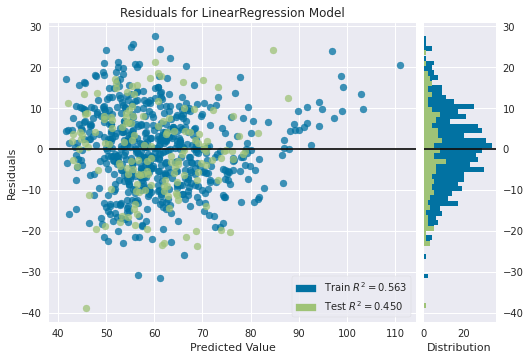

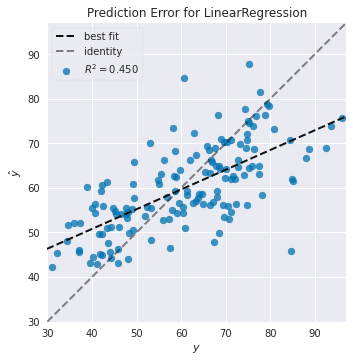

 Ridge() 


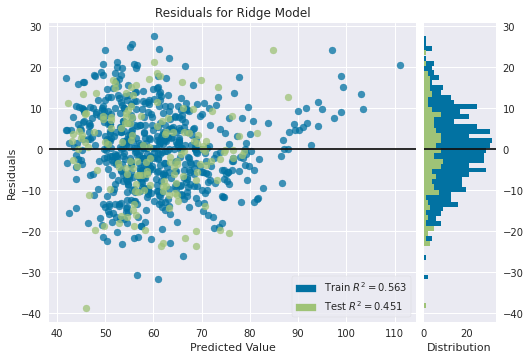

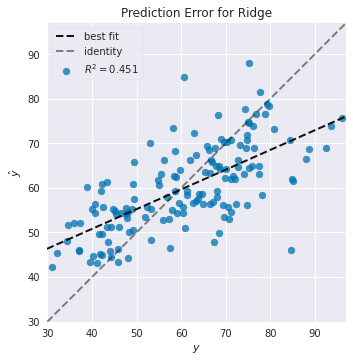

 Lasso() 


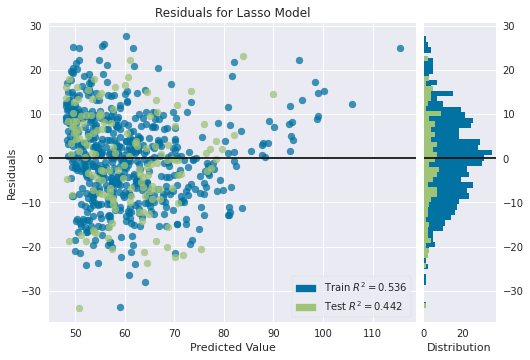

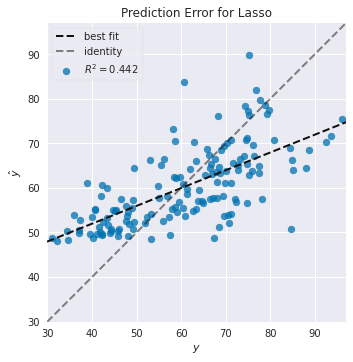

 ElasticNet() 


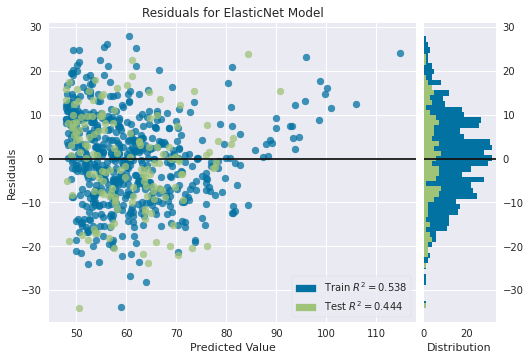

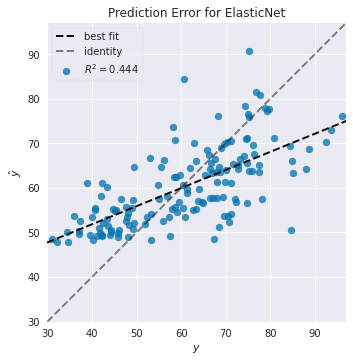

 OrthogonalMatchingPursuit() 


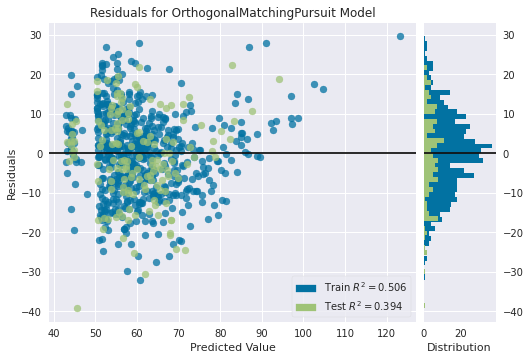

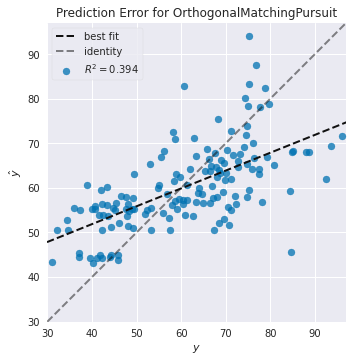

 BayesianRidge() 


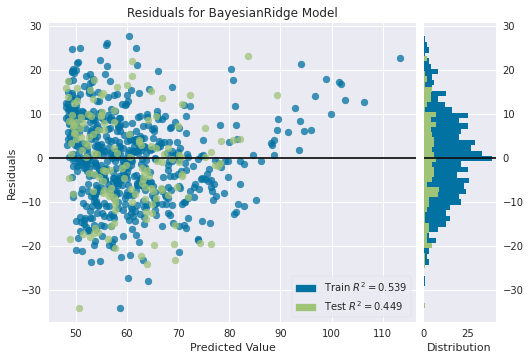

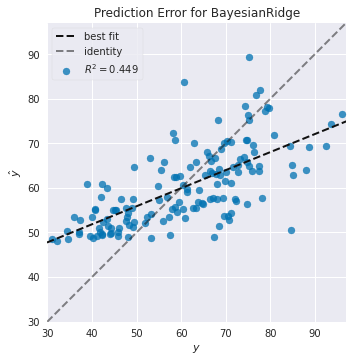

 ARDRegression() 


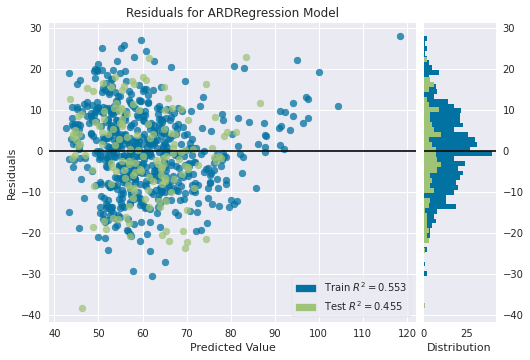

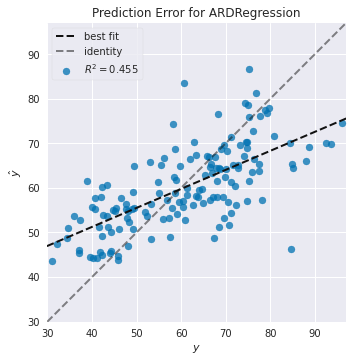

 SVR() 


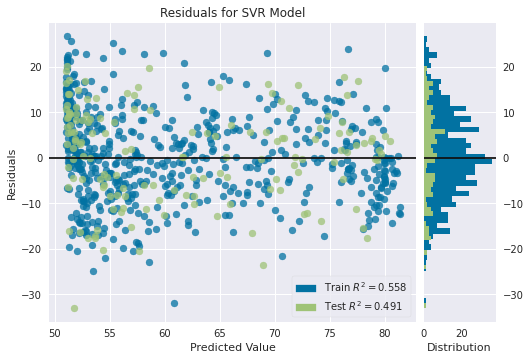

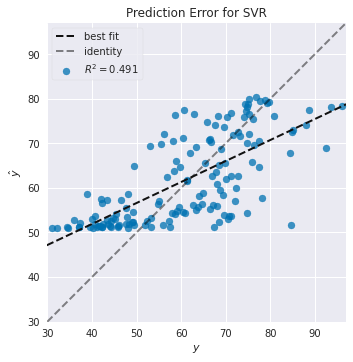

 DecisionTreeRegressor(max_depth=5) 


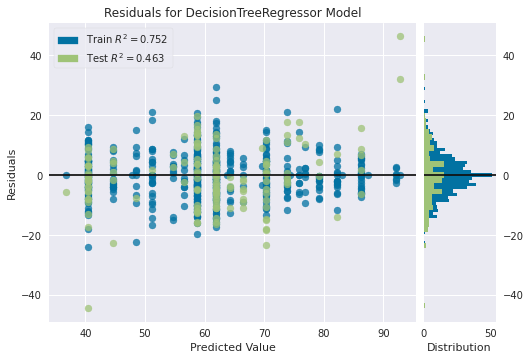

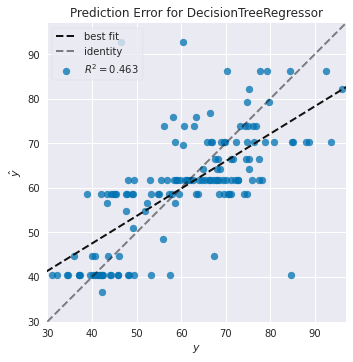

 RandomForestRegressor(max_depth=5) 


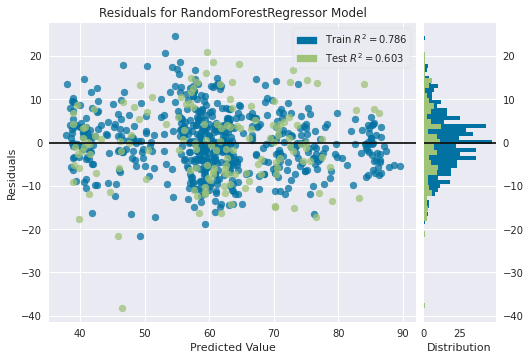

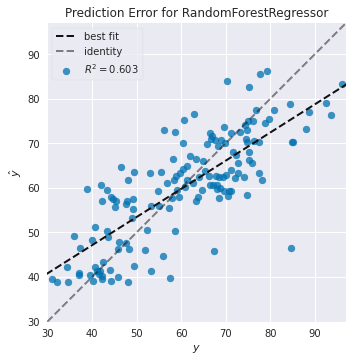

 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) 


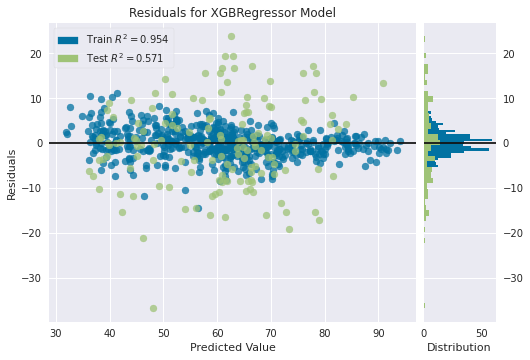

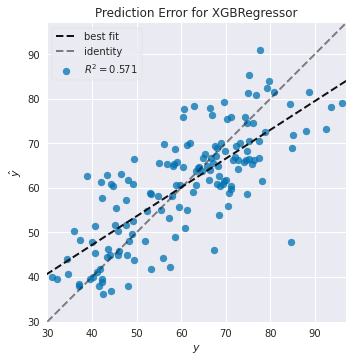

In [26]:
from yellowbrick.regressor import PredictionError

models = [
    LinearRegression(), 
    Ridge(), 
    Lasso(), 
    ElasticNet(), 
    OrthogonalMatchingPursuit(), 
    BayesianRidge(),
    ARDRegression(), 
    SVR(), 
    DecisionTreeRegressor(max_depth=5), 
    RandomForestRegressor(max_depth=5),
    xgb.XGBRegressor(max_depth=3)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def visualize_model(X_train, X_test, y_train, y_test, estimator, **kwargs): 
    print('\033[1m {} \033[0m'.format(estimator))
    resid_plot = ResidualsPlot(model)
    resid_plot.fit(X_train, y_train)
    resid_plot.score(X_test, y_test)
    resid_plot.show();
    
    pred_error = PredictionError(model)
    pred_error.fit(X_train, y_train)
    pred_error.score(X_test, y_test)
    pred_error.show();
    
for model in models:
    visualize_model(X_train, X_test, y_train, y_test, model)

In [28]:
model_scores = pd.DataFrame({'Model': [type(i).__name__ for i in models],
                'R\u00b2 score': [0.450, 0.451, 0.442, 0.444,
                                  0.394, 0.449, 0.455, 0.491, 
                                  0.463, 0.603, 0.571]})

model_scores.sort_values(by='R\u00b2 score', ascending=False)

Model  R² score
9       RandomForestRegressor     0.603
10               XGBRegressor     0.571
7                         SVR     0.491
8       DecisionTreeRegressor     0.463
6               ARDRegression     0.455
1                       Ridge     0.451
0            LinearRegression     0.450
5               BayesianRidge     0.449
3                  ElasticNet     0.444
2                       Lasso     0.442
4   OrthogonalMatchingPursuit     0.394

In [29]:
from sklearn.model_selection import GridSearchCV
# SVR

param_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svr_gs = GridSearchCV(SVR(),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='r2',
                      cv=10)

svr_grid = svr_gs.fit(X_train, y_train)
svr_optimal = svr_grid.best_estimator_
result = svr_gs.cv_results_

print('Best Parameters: ', svr_gs.best_params_)
print('Best Score: ', svr_gs.best_score_)

svr_optimal.fit(X_train, y_train)

Best Parameters:  {'C': 10, 'gamma': 0.001}
Best Score:  0.6072844155160839


SVR(C=10, gamma=0.001)

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.arange(100, 1000, 100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
             }

rf_gs = RandomizedSearchCV(RandomForestRegressor(),
                      return_train_score=True,
                      param_distributions=param_grid,
                      scoring='r2',
                      cv=10)

rf_grid = rf_gs.fit(X_train, y_train)
rf_optimal = rf_grid.best_estimator_
result = rf_gs.cv_results_

print('Best Parameters: ', rf_gs.best_params_)
print('Best Score: ', rf_gs.best_score_)

rf_optimal.fit(X_train, y_train)

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Score:  0.6520142443221364


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300)

In [31]:
# XGBRegressor


params_grid = {'max_depth': [3, 5, 6, 10, 15, 20],
          'min_child_weight': [3, 5, 7, 9],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'n_estimators': [100, 500, 1000],
          'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
          'subsample': np.arange(0.5, 1.0, 0.1)}

xgb = xgb.XGBRegressor(seed = 42)


xgb_gs = RandomizedSearchCV(xgb,
                      return_train_score=True,
                      param_distributions=params_grid,
                      scoring='r2',
                      cv=10)

xgb_grid = xgb_gs.fit(X_train, y_train)
xgb_optimal = xgb_grid.best_estimator_
result = xgb_gs.cv_results_

print('Best Parameters: ', xgb_gs.best_params_)
print('Best Score: ', xgb_gs.best_score_)

xgb_optimal.fit(X_train, y_train)

Best Parameters:  {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7999999999999999}
Best Score:  0.6341213326693148


XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=0.7, gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
best_model = rf_optimal
best_model

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300)

# PART THE LAST: Explaining the Model

In [35]:
import shap
feature_names = X.columns

In [36]:
explainer = shap.Explainer(best_model, feature_names=feature_names)
shap_values = explainer(X_test)

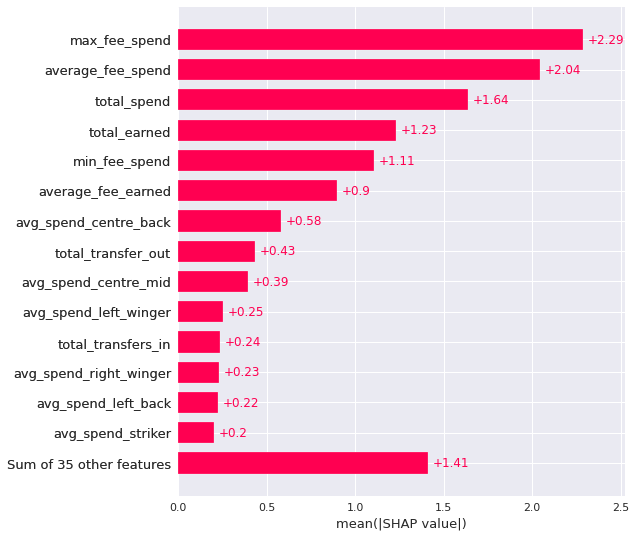

In [37]:
shap.plots.bar(shap_values, max_display=15)

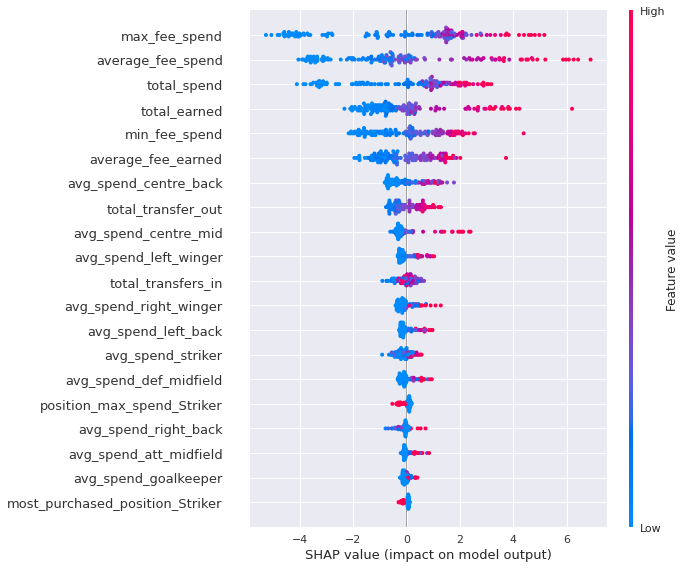

In [39]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

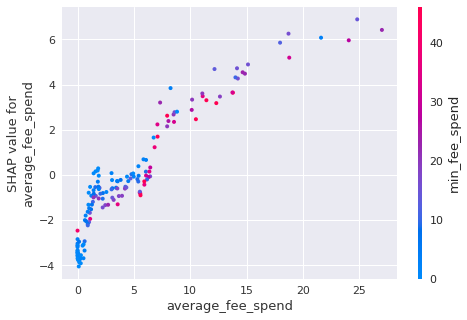

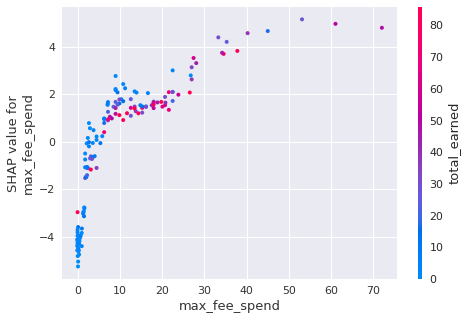

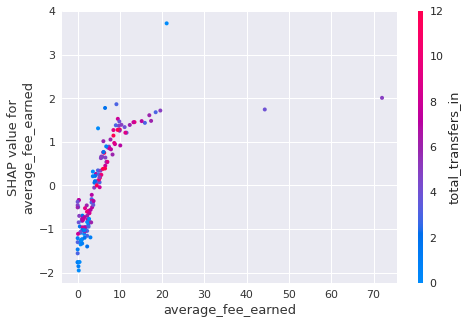

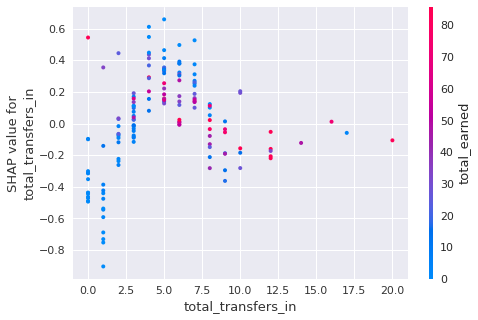

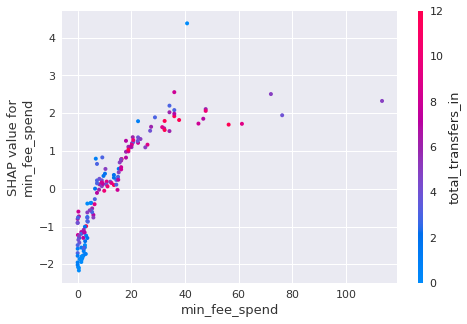

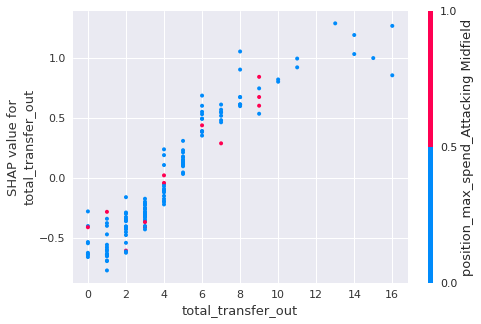

In [40]:
# FLAG

features = ['average_fee_spend', 'max_fee_spend', 'average_fee_earned', 
            'total_transfers_in', 'min_fee_spend', 'total_transfer_out']

for feature in features:
    shap.dependence_plot(feature, shap_values, X_test)

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [42]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

AttributeError: 'numpy.ndarray' object has no attribute 'cohorts'

In [43]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

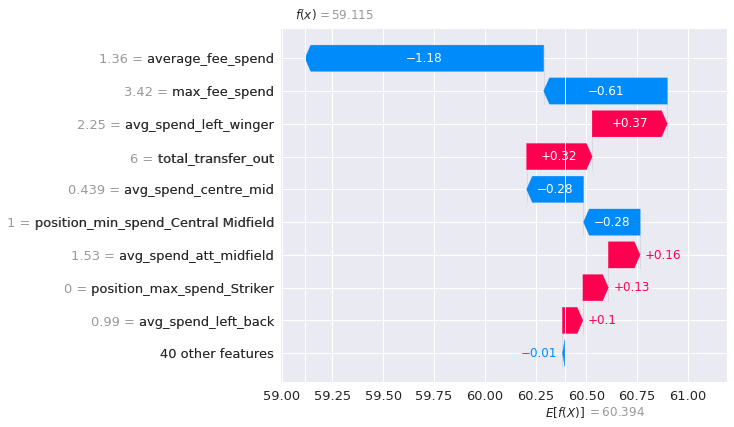

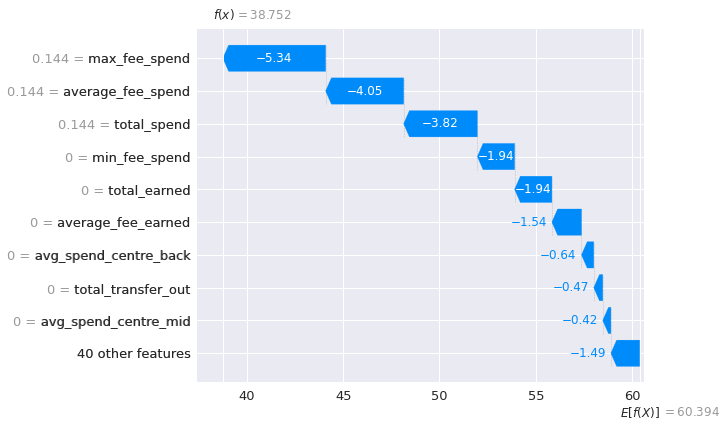

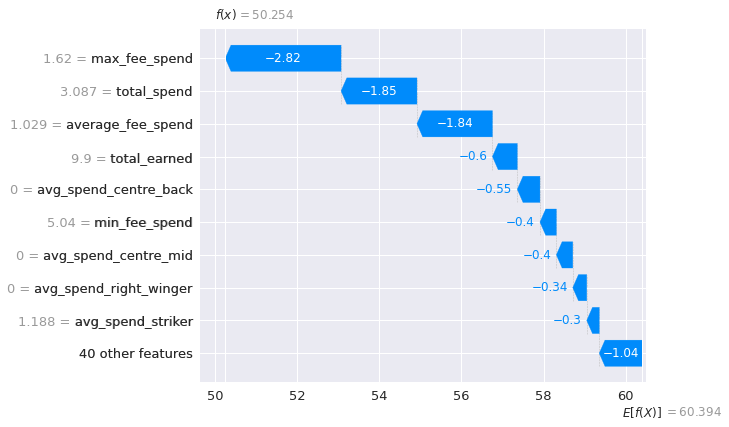

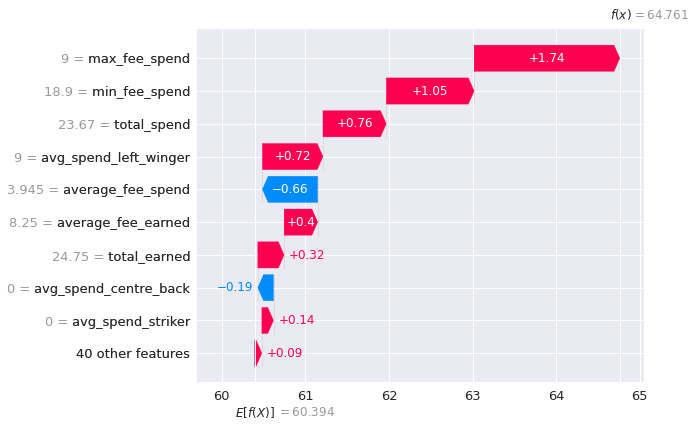

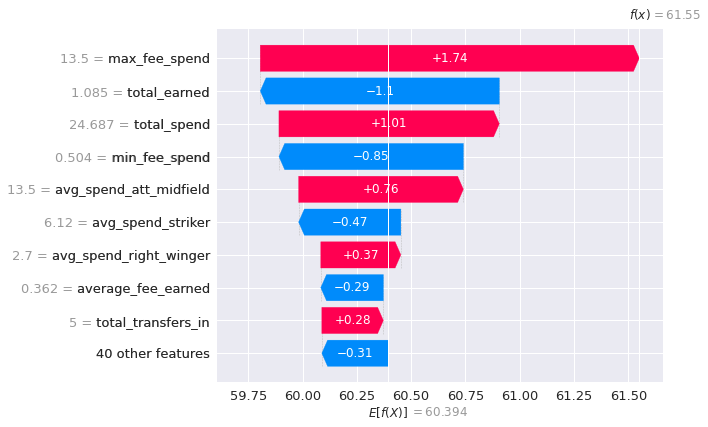

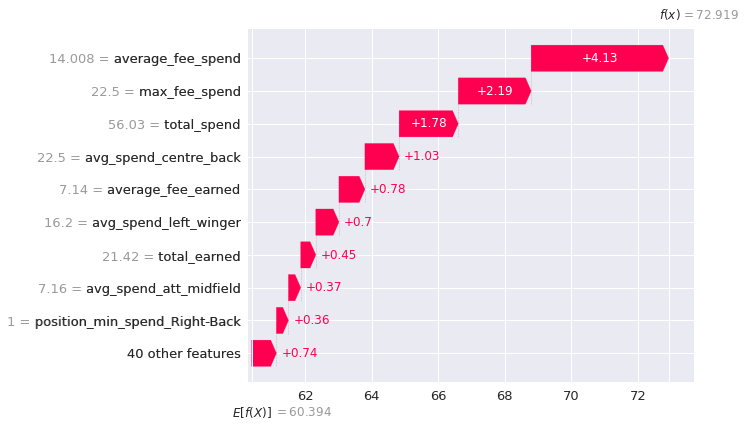

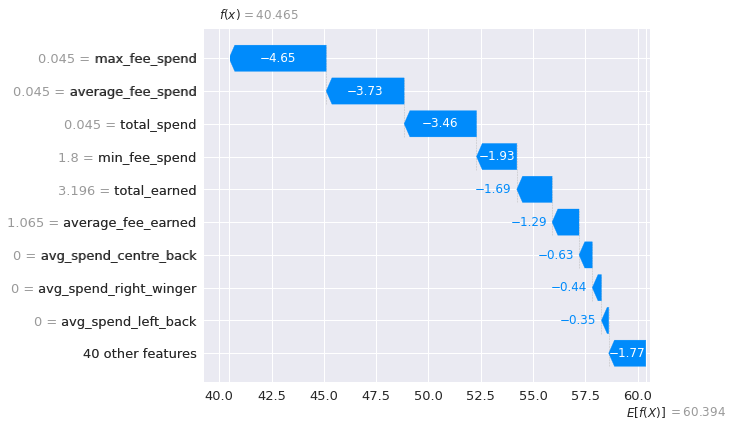

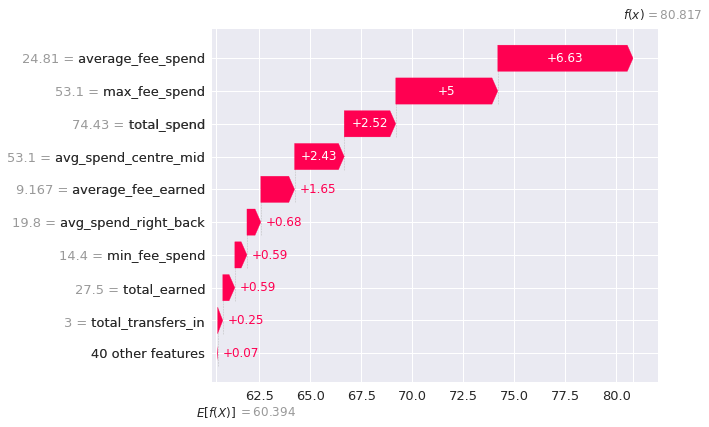

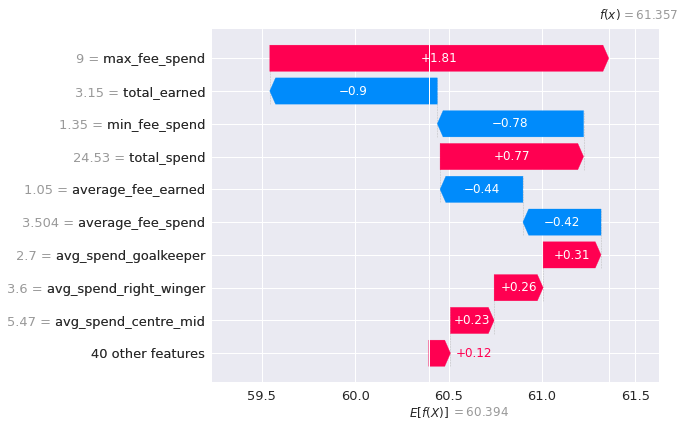

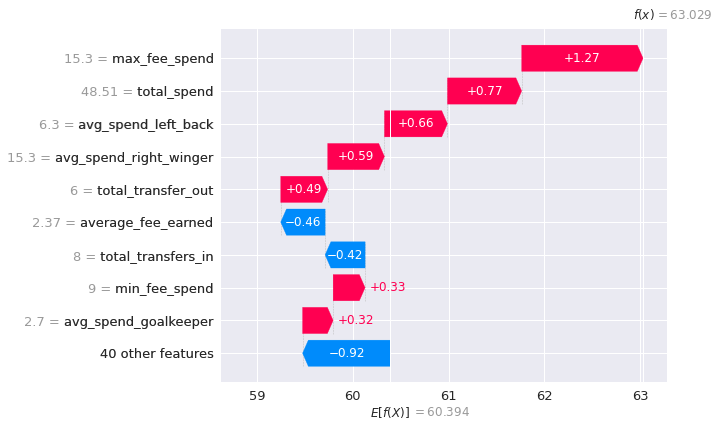

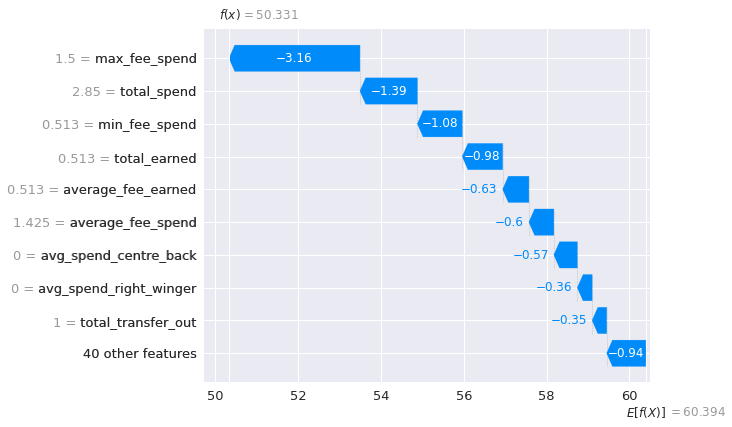

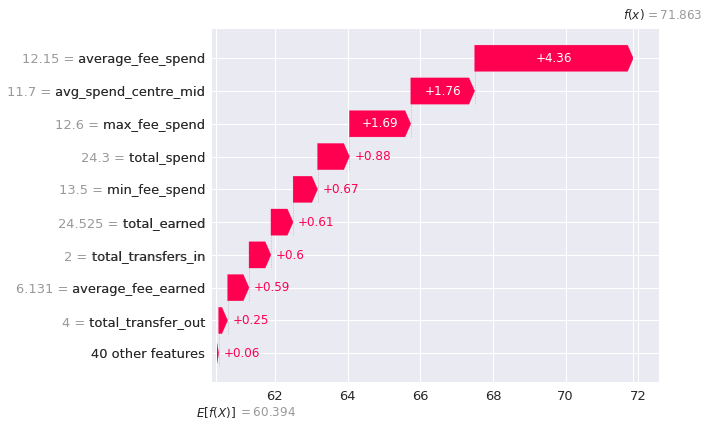

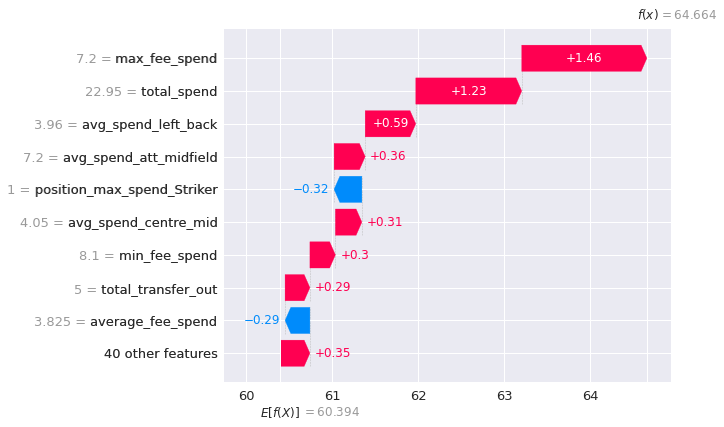

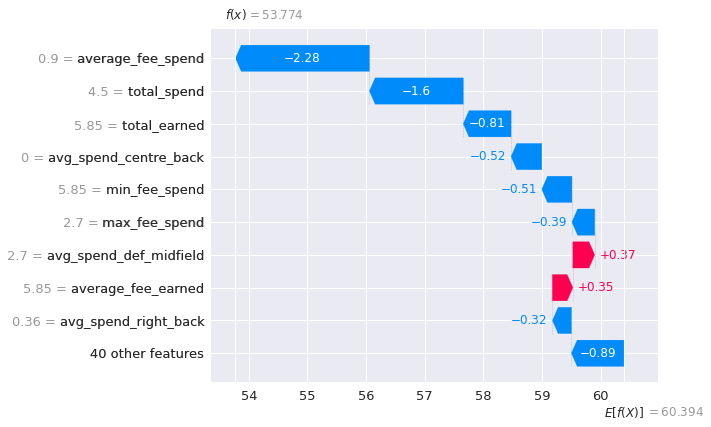

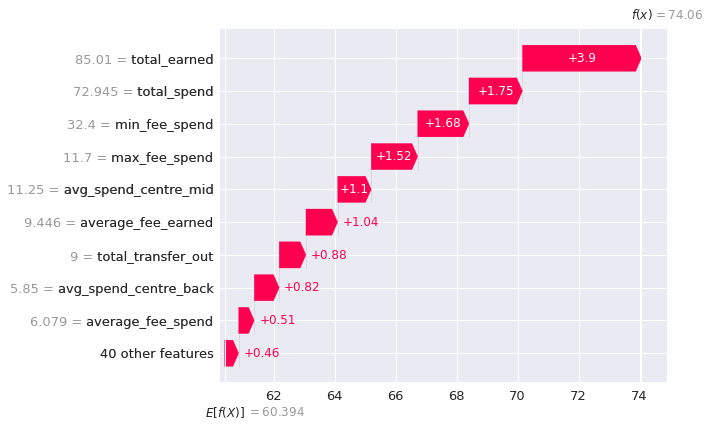

In [44]:
for i in np.arange(1, 151, 10):
    shap.plots.waterfall(shap_values[i])

In [45]:
explainer = shap.TreeExplainer(best_model)
expected_value = explainer.expected_value

In [46]:
feature_names = list(X_train.columns)

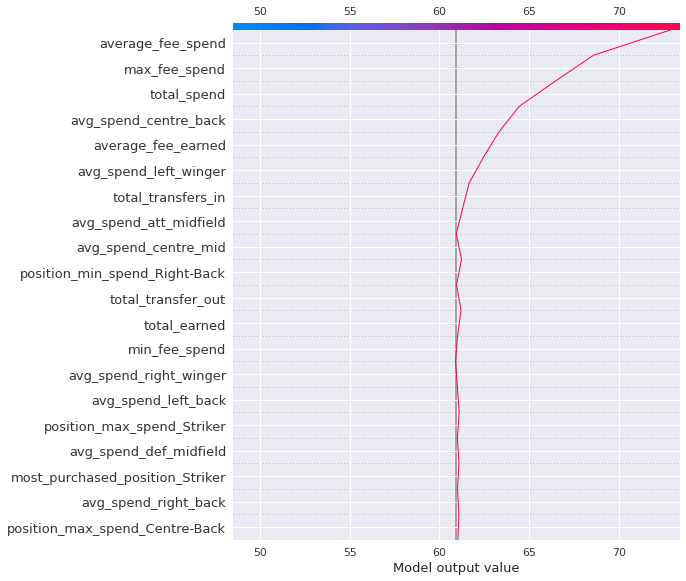

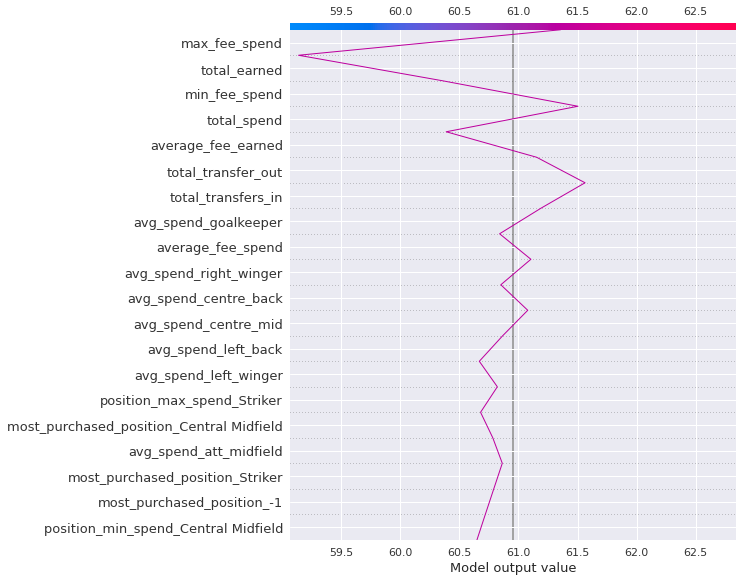

In [47]:
observations = [51, 81]

for obs in observations:
    shap.decision_plot(expected_value, explainer.shap_values(X_test)[obs], feature_names=feature_names)

In [1]:
shap.initjs()
for obs in observations:
    display(shap.force_plot(expected_value, explainer.shap_values(X_test)[obs], feature_names=feature_names))

NameError: name 'shap' is not defined

In [49]:
import pickle

filename = 'finalized_no_frees_model_random_forest.sav'
pickle.dump(model, open(filename, 'wb'))